<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/GeneticAlgorithms/GeneticAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithms 

This is the corresponding practice class for Genetic Algorithms in R, repeating all the steps done in class to familiarise ourselves with these methods. Let's first load the corresponding library GA. 

In [3]:
install.packages('GA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’




In [4]:
library('GA')

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.2
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de




## Optimization for one point 

First, we are going to deal with searching the minimum of a function that has a single minimum point. It's not a very nice function, since it is not derivable at this precise minimum. This is due to the presence of the abs(x) function as a part of it. 

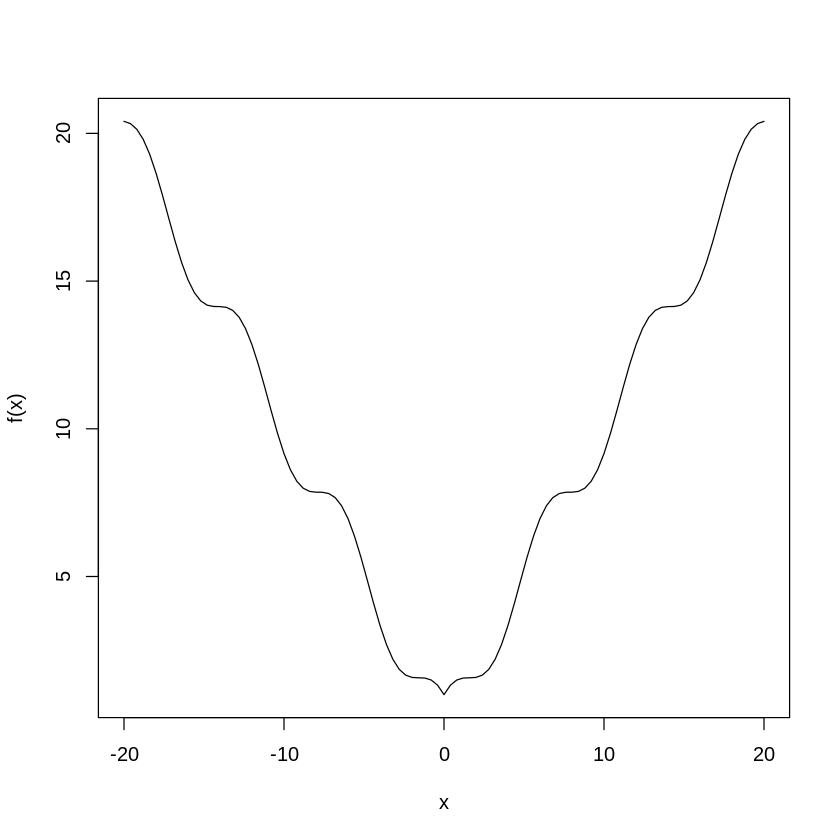

In [6]:
f <- function(x) abs(x)+cos(x)
curve(f,-20,20)

We create a function -f(x) because, at the same time, this library only maximises. 

In [7]:
fitness <- function(x) -f(x)

Now we do the corresponding optimization with genetic algorithm and we visualize the results as provided by our function. We see that the minimum is sufficiently near 0, which is the minimum value. Nice! 

In [8]:
GA <- ga(type='real-valued',fitness=fitness,lower=-20,upper=20)

In [9]:
summary(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
       x1
lower -20
upper  20

GA results: 
Iterations             = 100 
Fitness function value = -1.00011 
Solution = 
               x1
[1,] 0.0001102141

Now we'll plot some results. Doing plot will gives us an idea of how the convergence process was. 

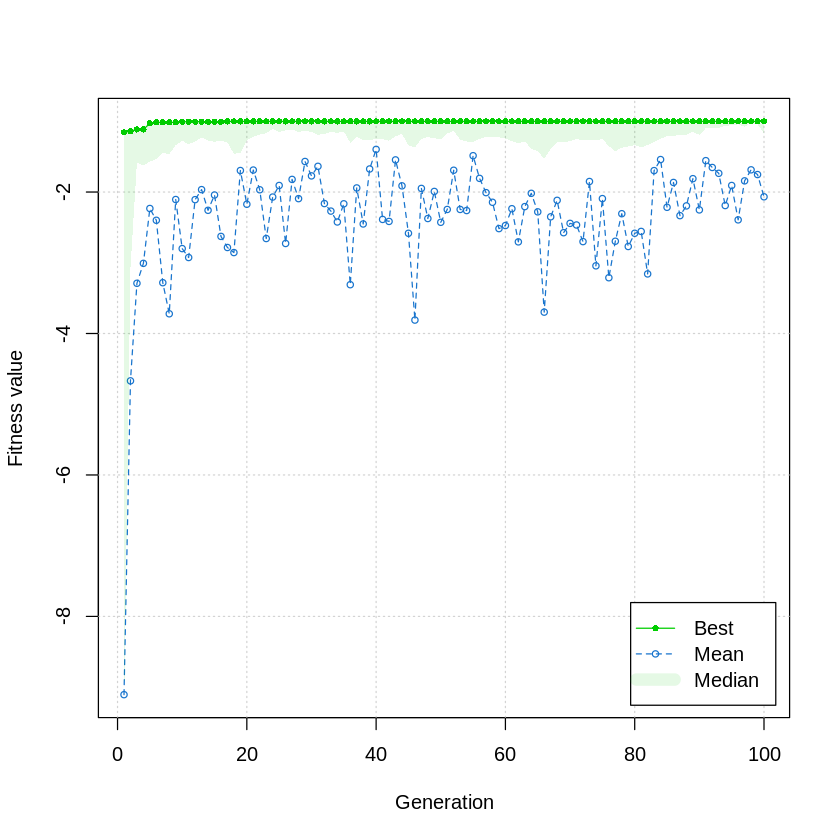

In [10]:
plot(GA)

Next, we will plot where the minimum is alongside the function itself. 

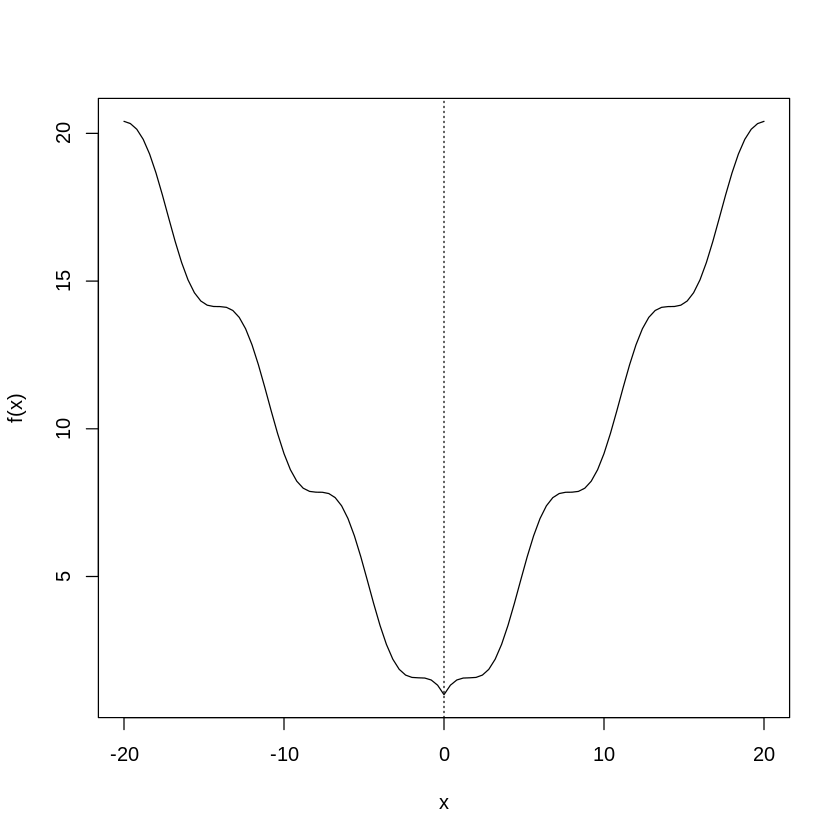

In [12]:
curve(f,-20,20)
abline(v=GA@solution, lty=3)

## Optimization for two values - Binary optimization

In this case, we are going to create a genetic algorithm to optimize the organization of elements in a bag. That's why, firstly, we will load the data of these elements with their names, weight and value in survival. Some errors arise due to the names containing punctuation signs of the Spanish Language, but it's nothing to worry about.  

In [17]:
h <- read.csv('DatosMochila.csv',sep=';')

In [18]:
head(h)

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mi

,Item,Peso,Valor
,<chr>,<dbl>,<dbl>
1,Bolsa de dormir,5.00,3.000
2,Cantimplora,1.00,4.000
3,Cuchillo,0.25,1.000
4,F<95>sforos,0.25,1.000
5,Servilleta,0.10,0.050
6,Anteojos,0.10,0.025


Now, we create a function which we will optimize to see which things we should carry in our bag. We get that, with this criteria, we only have to take the brujula (that is, the compass) which honestly doesn't seem like a satisfactory solution, neither in theory nor in pratice. 

In [26]:
f <- function(x)
{
  n <- length(x)
  sv <- 0 # sum value, initially 0
  sp <- 0 # sum weight, initially 0
  for(i in 1:n){
    sv <- sv + as.numeric(as.vector(h$Valor[i]))*x[i]
    sp <- sp + as.numeric(as.vector(h$Peso[i]))*x[i]
  }
  v <- 0
  if(sp<10){ # we won't carry more than 10 units of weight
    v <- sv/sp
  }
  v
}

In [30]:
GA.fit <- ga(type='binary',fitness=f,popSize=50, maxiter=1000,run=100,lower=-10,upper=10,nBits=nrow(h))

In [31]:
GA.fit@solution

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,0,0,0,0,0,0,1,0,0,0


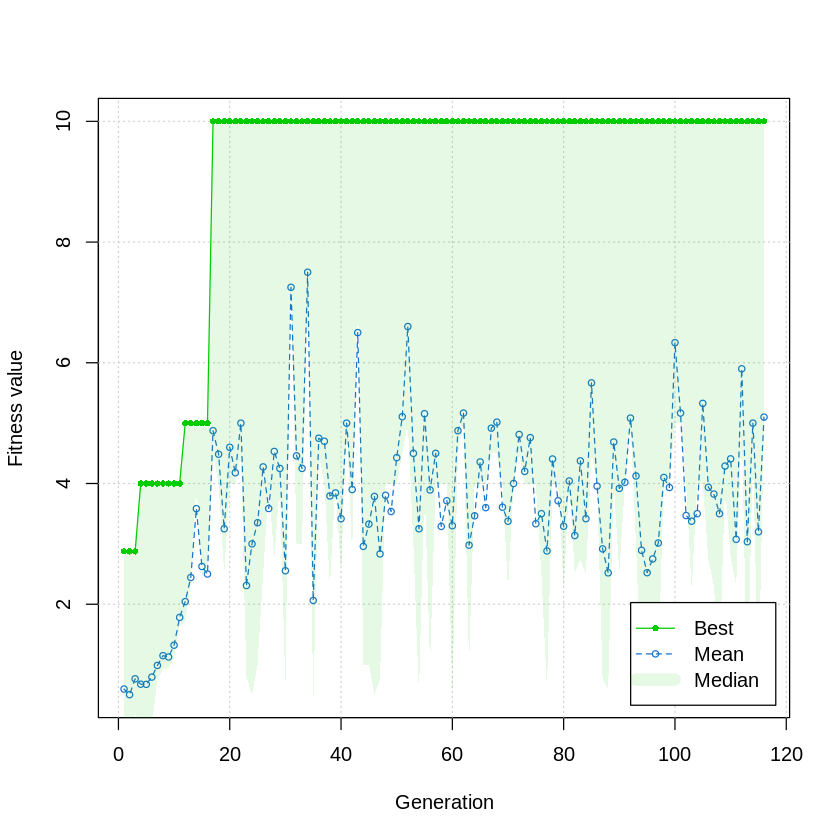

In [32]:
plot(GA.fit)

Since the solution is lackluster, we will decide on another fitness function to see if it represents better a solution like the one we would expect. In this case, we won't consider the weight in the v, and we will just prioritize the value for survival and try to put the limit at 10 again for sp in the last if. 

In [33]:
f <- function(x)
{
  n <- length(x)
  sv <- 0 # sum value, initially 0
  sp <- 0 # sum weight, initially 0
  for(i in 1:n){
    sv <- sv + as.numeric(as.vector(h$Valor[i]))*x[i]
    sp <- sp + as.numeric(as.vector(h$Peso[i]))*x[i]
  }
  v <- 0
  if(sp<10){ # we won't carry more than 10 units of weight
    v <- sv
  }
  v
}

In [34]:
GA.fit <- ga(type='binary',fitness=f,popSize=50, maxiter=1000,run=100,lower=-10,upper=10,nBits=nrow(h))

In [35]:
GA.fit@solution

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
1,1,1,1,1,1,1,0,1,0,1,0


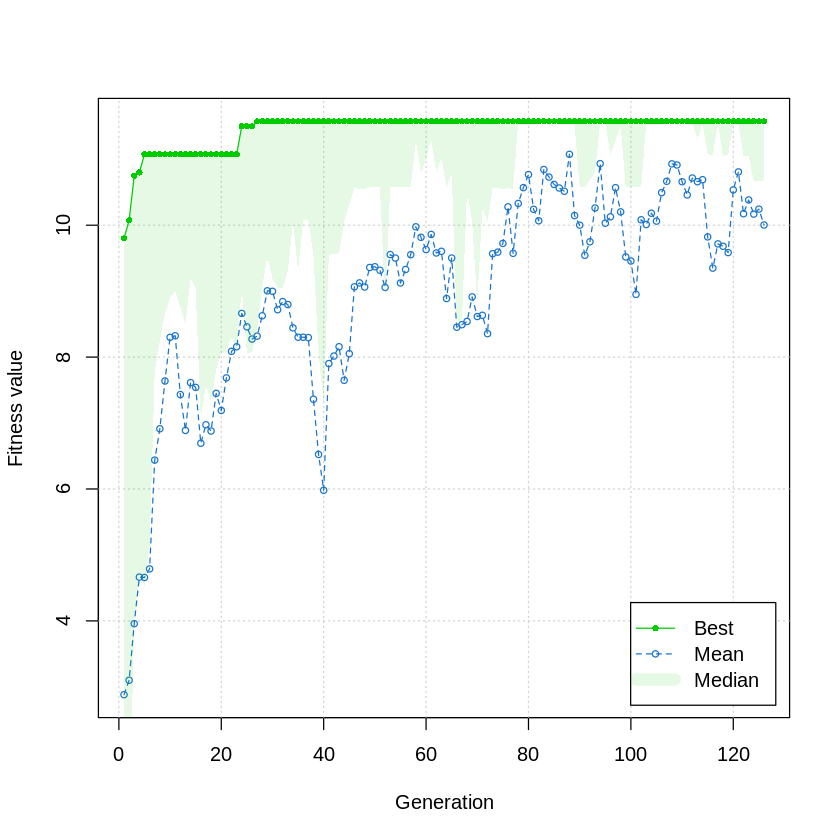

In [36]:
plot(GA.fit)

How much does this bag weight? If we sum the elements of the solution we get just under 10 kilograms, which is a nice thing. We may doubt the survival value, but that seems right. 

In [39]:
sum(h$Peso) - h$Peso[12]- h$Peso[10] - h$Peso[8]

[1] 9.75

## Combinatorics Optimization

In this case, we will deal with the problem of a traveller that has to go by many cities, optimizing they way they go through them, according to some criteria. For this, we will first create a random set of cities with their locations and everything. 

In [40]:
ciudades <- matrix(nrow=3,ncol=8)
rownames(ciudades) <- c('N','X','Y')
ciudades[1,] <- c('A','B','C','D','E','F','G','H')
ciudades[2,] <- runif(8)
ciudades[3,] <- runif(8)

Now we calculate the distances matrix. 

In [41]:
D <- matrix(nrow=8,ncol=8)

for(i in 1:8){
  for(j in 1:8){
    D[i,j] <- sqrt((as.numeric(ciudades[2,i])-as.numeric(ciudades[2,j]))^2 + (as.numeric(ciudades[3,i])-as.numeric(ciudades[3,j]))^2)
  }
}

And we define a fitness function, which will be the length of the journey of our traveller. 

In [42]:
tourLength <- function(tour,distMatrix){
  d <- 0
  for(i in 2:length(tour)){
    d <- d + distMatrix[tour[i-1],tour[i]]
  }
  d
}

In [43]:
tpsFitness <- function(tour,...){
  1/tourLength(tour,...)
}

Now, we are ready to actually do the optimization. 

In [56]:
GA.fit <- ga(type='permutation',fitness=tpsFitness,distMatrix=D,lower=1,upper=8,popSize=10, maxiter=5000, run=1000,pmutation=0.2)

In [57]:
summary(GA.fit)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  permutation 
Population size       =  10 
Number of generations =  5000 
Elitism               =  1 
Crossover probability =  0.8 
Mutation probability  =  0.2 

GA results: 
Iterations             = 1093 
Fitness function value = 0.6118544 
Solution = 
     x1 x2 x3 x4 x5 x6 x7 x8
[1,]  2  6  4  3  8  5  7  1

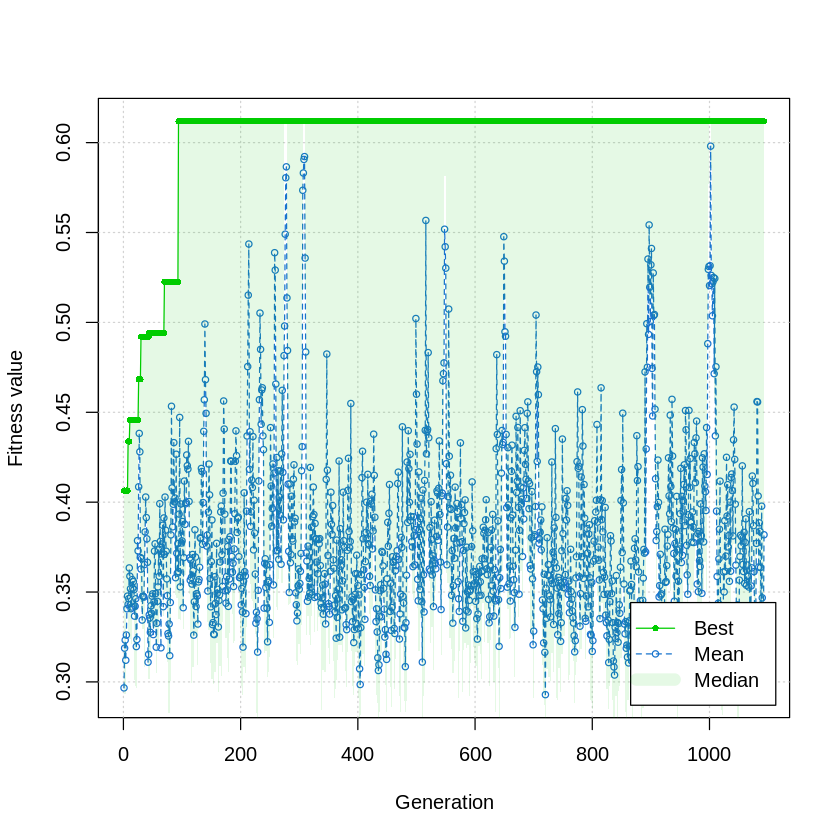

In [58]:
plot(GA.fit)

Now, let's visualise our solution in a 2D plane. 

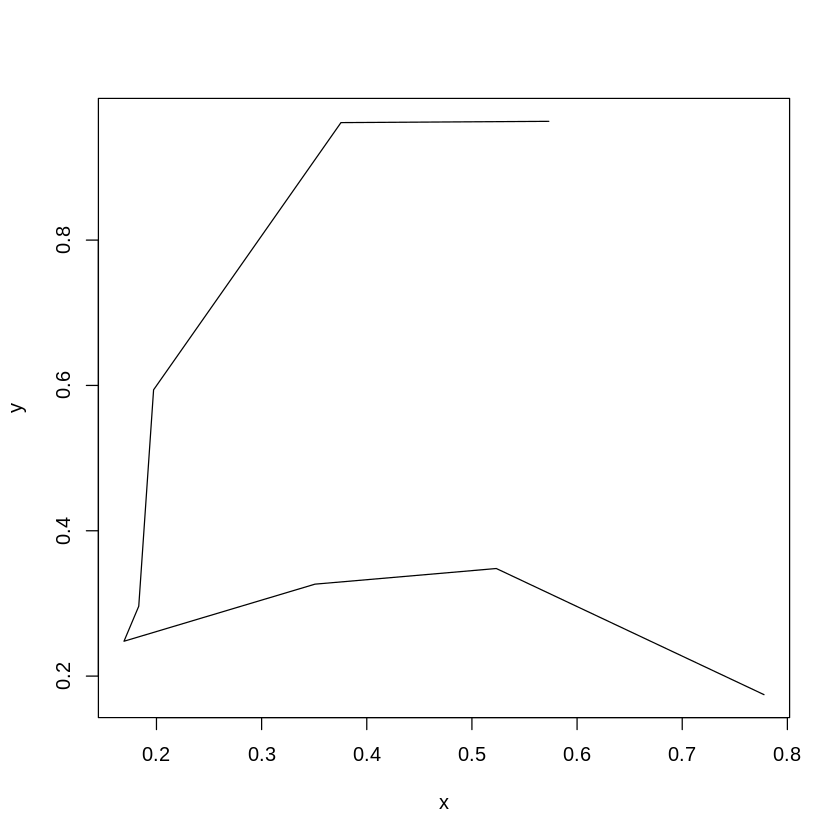

In [59]:
r <- GA.fit@solution
x <- numeric(8)
y <- numeric(8)

for(i in 1:8){
  x[i] <- ciudades[2,r[i]]
  y[i] <- ciudades[3,r[i]]
}

plot(x,y,type='l')